# Sentiment analysis

## Lecture objectives
1. Demonstrate how to implement and interpret sentiment analysis
2. Discuss the use of polarity and subjectivity scores
3. Explore how to create figures with multiple subplots

In its simplest form, sentiment analysis works through applying a corpus of words and phrases that indicate sentiment. [SentiWordNet](https://github.com/aesuli/SentiWordNet) is a commonly used corpus—[look at the list here](https://raw.githubusercontent.com/aesuli/SentiWordNet/master/data/SentiWordNet_3.0.0.txt). For example, "worst," "terrible," and "apprehensive" have negative scores, while "feel_like_a_million_dollars" has a positive score. Some words have both positive and negative scores. Some algorithms consider the part of speech in which the word occurs (e.g. is it an adjective or noun).

In this lecture, we'll use Reddit as our source of data. However, sentiment analysis can be applied to any other opinionated source of data, such as Twitter (as in [Schweitzer 2014](https://www.tandfonline.com/doi/abs/10.1080/01944363.2014.980439)) or Yelp (as in [Jiang and Mondschein 2021](https://link.springer.com/article/10.1007/s42421-021-00036-1)).

Let's start through loading in the Reddit comments that we saved in the previous lecture.

In [1]:
import pickle
with open('../data/reddit/la_metro.pickle', 'rb') as f:
    la_metro = pickle.load(f)
with open('../data/reddit/bart.pickle', 'rb') as f:
    bart = pickle.load(f)
with open('../data/reddit/nyc_rail.pickle', 'rb') as f:
    nyc_rail = pickle.load(f)
la_metro[0]

'Construction vehicles going down the subway tracks. They look to be bound for the Purple Line Extension'

Let's turn to sentiment analysis. `textblob` uses the corpora (basically, a body of text) from the `nltk` library. We already downloaded a couple of corpora such as stop words, but we need two more. 

In [2]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from textblob import TextBlob

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/chaithra/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaithra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's try some examples. Note from the [documentation](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis): 

* The sentiment property returns a named tuple of the form `Sentiment(polarity, subjectivity)`. 
* The polarity score is a float within the range [-1.0, 1.0].
* The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [3]:
sentence = TextBlob('I love riding public transit')
print(sentence.sentiment)

Sentiment(polarity=0.25, subjectivity=0.3333333333333333)


In [4]:
sentence = TextBlob('My bus was late AGAIN today.')
print(sentence.sentiment)

Sentiment(polarity=-0.3, subjectivity=0.6)


We can access the polarity score directly. (Let's ignore subjectivity.)

In [5]:
sentence.sentiment.polarity

-0.3

Now let's come back to our reddit comments. We can compute the sentiment (polarity) score for each comment. 

Let's use a list comprehension to loop over each comment.

In [6]:
# the list comprehension is the same as
la_sentiment = []
for c in la_metro:
    la_sentiment.append(TextBlob(c).sentiment.polarity)

la_sentiment = [TextBlob(c).sentiment.polarity for c in la_metro]
bart_sentiment = [TextBlob(c).sentiment.polarity for c in bart]
nyc_sentiment = [TextBlob(c).sentiment.polarity for c in nyc_rail]

We get lists of sentiments. Let's look at the first few.

In [7]:
for i in range(5):
    print('Sentiment: {:.2f}. Comment: {}'.format(la_sentiment[i], la_metro[i]))

Sentiment: -0.16. Comment: Construction vehicles going down the subway tracks. They look to be bound for the Purple Line Extension
Sentiment: 0.00. Comment: Next 3 months: +0.01% completion
Sentiment: 0.24. Comment: Somebody better make sure there isn’t a Federal Reserve down that way, and if there is ensure Simon Gruber is nowhere near it.
Sentiment: 0.00. Comment: Vote on LAPD transit patrols sparks City Hall debate over safety on Metro system
Sentiment: -0.39. Comment: This is so insane to me. They were paying for _the last 6 months of 2022_. A time period where every regular metro rider saw cops doing nothing but playing with their phones and sitting in their cars.

> Councilmember Traci Park, who represents coastal neighborhoods, defended the contract extension, noting that bus and train riders faced a 24% increase in serious crime on Metro’s system last year.

Yeah, _during the time period you're voting to pay them for_. They failed! The problem they're in charge of solving got w

Now let's visualize it. A histogram seems appropriate here.

Note that the seaborn `histplot` can take a list or any other sequence, as well as a `DataFrame`. 

In [8]:
import seaborn as sns
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

<Axes: ylabel='Count'>

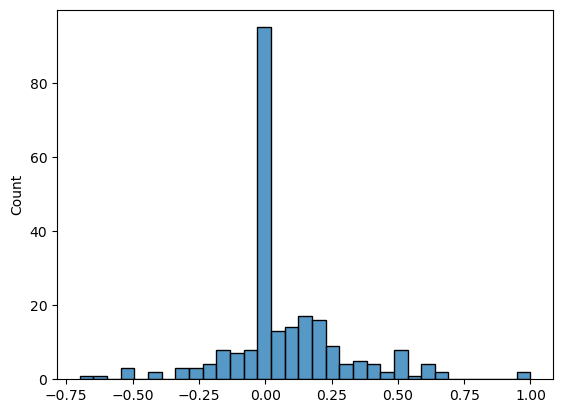

In [9]:
sns.histplot(la_sentiment)

Let's compare the different transit agencies.

We've already used the `plt.subplots()` function to create a set of axes. However, its real power comes in creating figures with multiple plots.

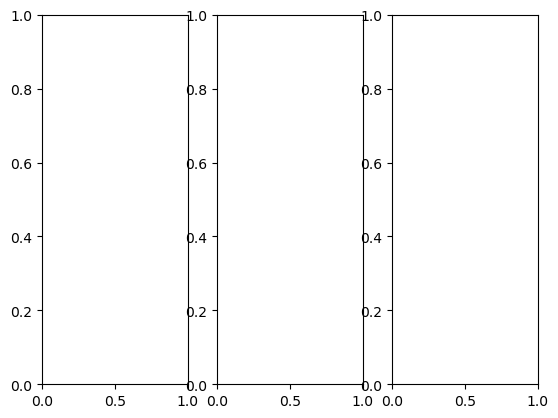

In [10]:
import matplotlib.pyplot as plt

# this creates a 1x3 matrix of plots, and returns a list of axes objects
fig, axes = plt.subplots(1, 3)

Because `axes` is a list, we can now access each axis as `axes[0]`, `axes[1]`, etc.

We can even loop over each axis as with any other list. That's useful for plotting lots of subgroups.

Here, we'll use a loop to clean up each plot. We'll use the `zip` notation, that loops over equal-length lists and pairs them up. For example, the first iteration of the loop will put the first element of `axes` in `ax`, and the first element of `cities` in `city`.

We'll make the axes have the same extent for each plot, and set the y-axis label on only the left-hand axis.

`fig.tight_layout()` is a useful command to clean up the spacing.

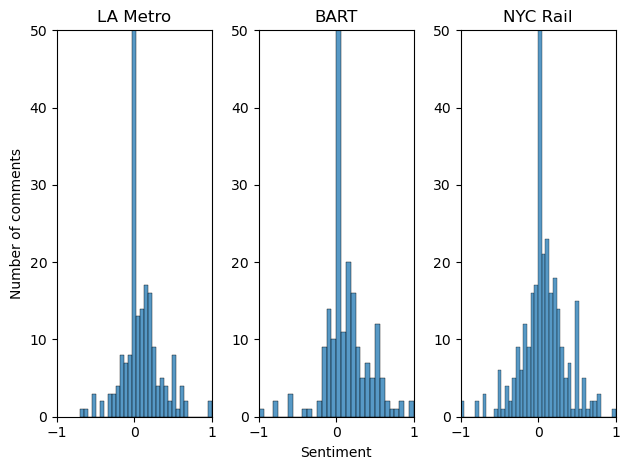

In [11]:
fig, axes = plt.subplots(1, 3)

sns.histplot(la_sentiment, ax=axes[0])
sns.histplot(bart_sentiment, ax=axes[1])
sns.histplot(nyc_sentiment, ax=axes[2])

subreddits = ['LA Metro', 'BART', 'NYC Rail']
for ax, sr in zip(axes, subreddits):
    ax.set_title(sr)
    ax.set_ylim(0,50)
    ax.set_xlim(-1,1)
    ax.set_ylabel('')
axes[0].set_ylabel('Number of comments')
axes[1].set_xlabel('Sentiment')
fig.tight_layout()

There is lots more we can do here. For example:
* We relied on different subreddits, which might attract different types of users. Perhaps it makes more sense to look at a broader city subreddit, and then filter for posts about buses and trains.
* We could tokenize (split) each comment into sentences. Otherwise, for longer comments, the more polarized (opinionated) comments might be watered down with other sentences.
* We could use a different sentiment analyzer ([`TextBlob` has a couple of pre-trained options](https://textblob.readthedocs.io/en/dev/advanced_usage.html)) or train our own sentiment analyzer using the `nltk` 
functionality. 
* Note that sentiment analyzers are often trained on movie reviews and similarly "opinionated" corpuses, and so more specialist applications need custom training. In some of my [own work](https://conbio.onlinelibrary.wiley.com/doi/10.1111/csp2.624), we found that the writing was too technical or dry in style for sentiment analysis to work.

But I'll leave those for you to explore on your own.

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
    <li>Sentiment analysis can identify positive and negative sentiments towards a topic. The pre-trained models might not work well for your data, but you can train your own.</li>
</ul>
</div>